## 1. Import Libraries and Load Data

In [2]:
!pip install wordcloud

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import os

# Set style for visualizations
plt.style.use('seaborn')
sns.set_palette('husl')

# Load data
try:
    df = pd.read_csv(r'C:\Projects\Job Recommendation\data\job_descriptions.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: Could not find job descriptions data file.")

C:\Users\Komal Patil\AppData\Local\Temp\ipykernel_21788\855468556.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Data loaded successfully!


## 2. Basic Information

In [6]:
df.shape

(1615940, 23)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 27 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Job Id                1615940 non-null  int64  
 1   Experience            1615940 non-null  object 
 2   Qualifications        1615940 non-null  object 
 3   Salary Range          1615940 non-null  object 
 4   location              1615940 non-null  object 
 5   Country               1615940 non-null  object 
 6   latitude              1615940 non-null  float64
 7   longitude             1615940 non-null  float64
 8   Work Type             1615940 non-null  object 
 9   Company Size          1615940 non-null  int64  
 10  Job Posting Date      1615940 non-null  object 
 11  Preference            1615940 non-null  object 
 12  Contact Person        1615940 non-null  object 
 13  Contact               1615940 non-null  object 
 14  Job Title             1615940 non-

In [15]:
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,description_length
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",200
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",231
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",222
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",200
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",235


In [8]:
df.isnull().sum()

Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64

## 3. Job Title Analysis

Number of unique job titles: 147

Top 10 Most Common Job Titles:
Job Title
UX/UI Designer                  48551
Digital Marketing Specialist    27975
Software Engineer               27630
Network Engineer                24393
Software Tester                 20945
Executive Assistant             20776
Procurement Manager             20734
Financial Advisor               20687
Sales Representative            17664
Social Media Manager            17613
Name: count, dtype: int64


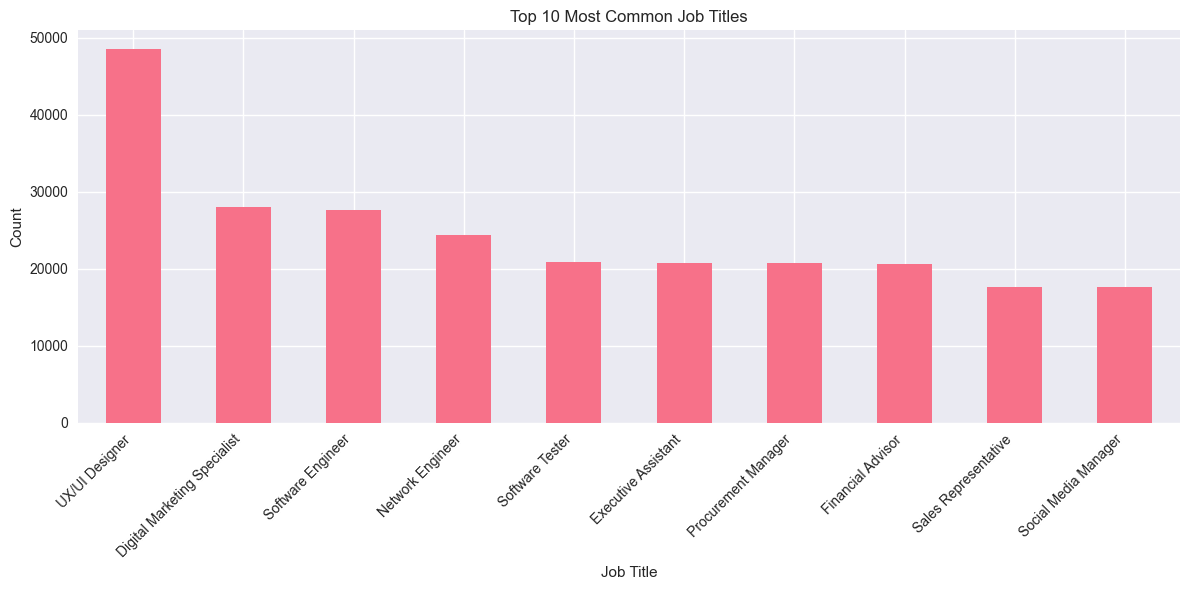

In [9]:
# Count unique job titles
unique_titles = df['Job Title'].nunique()
print(f"Number of unique job titles: {unique_titles}")

# Top 10 most common job titles
print("\nTop 10 Most Common Job Titles:")
title_counts = df['Job Title'].value_counts().head(10)
print(title_counts)

# Plot job title distribution
plt.figure(figsize=(12, 6))
title_counts.plot(kind='bar')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Job Description Analysis


Description Length Statistics:
count    1.615940e+06
mean     1.853684e+02
std      5.174361e+01
min      8.100000e+01
25%      1.560000e+02
50%      1.780000e+02
75%      2.130000e+02
max      4.300000e+02
Name: description_length, dtype: float64


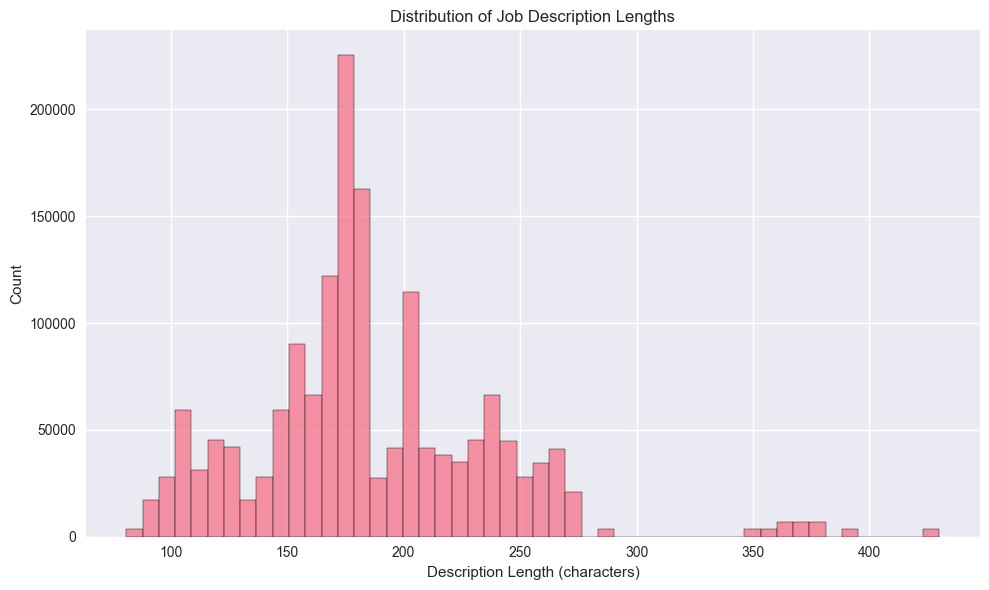

In [10]:
# Calculate description lengths
df['description_length'] = df['Job Description'].str.len()

# Basic statistics
print("\nDescription Length Statistics:")
print(df['description_length'].describe())

# Plot description length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['description_length'], bins=50)
plt.title('Distribution of Job Description Lengths')
plt.xlabel('Description Length (characters)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [18]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile',
       'description_length', 'Job Description_len', 'skills_len'],
      dtype='object')

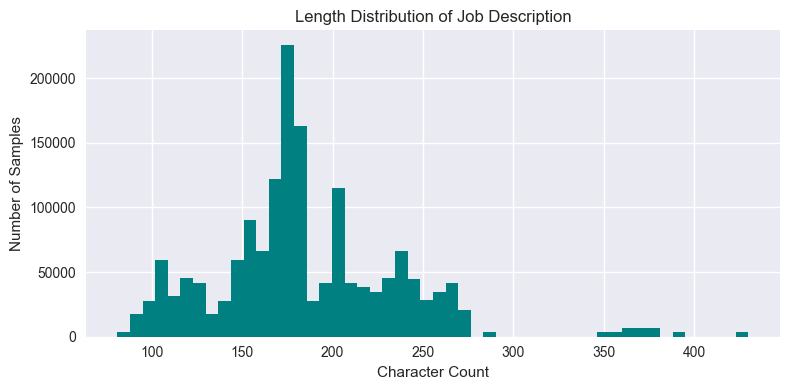

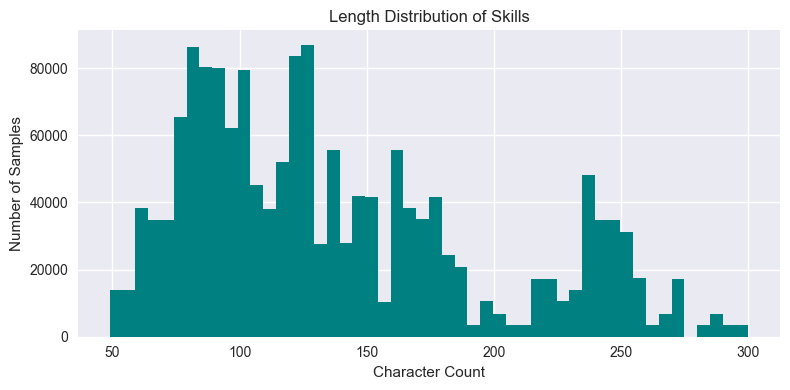

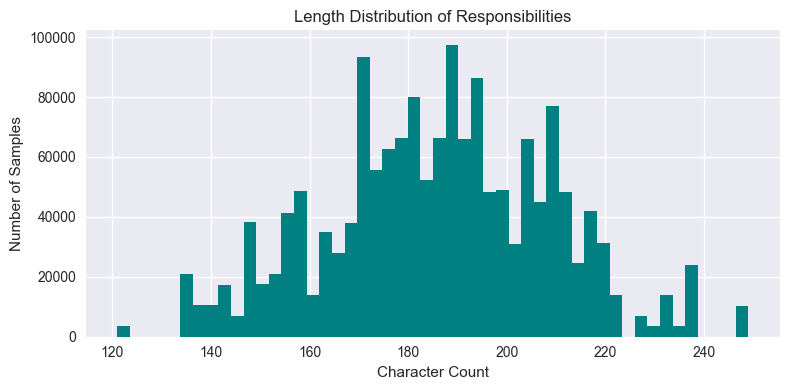

In [19]:
text_columns = ['Job Description', 'skills', 'Responsibilities']

import matplotlib.pyplot as plt

for col in text_columns:
    df[f'{col}_len'] = df[col].astype(str).apply(len)

    plt.figure(figsize=(8, 4))
    df[f'{col}_len'].hist(bins=50, color='teal')
    plt.title(f"Length Distribution of {col.replace('_', ' ').title()}")
    plt.xlabel("Character Count")
    plt.ylabel("Number of Samples")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Other Categorical Attributes

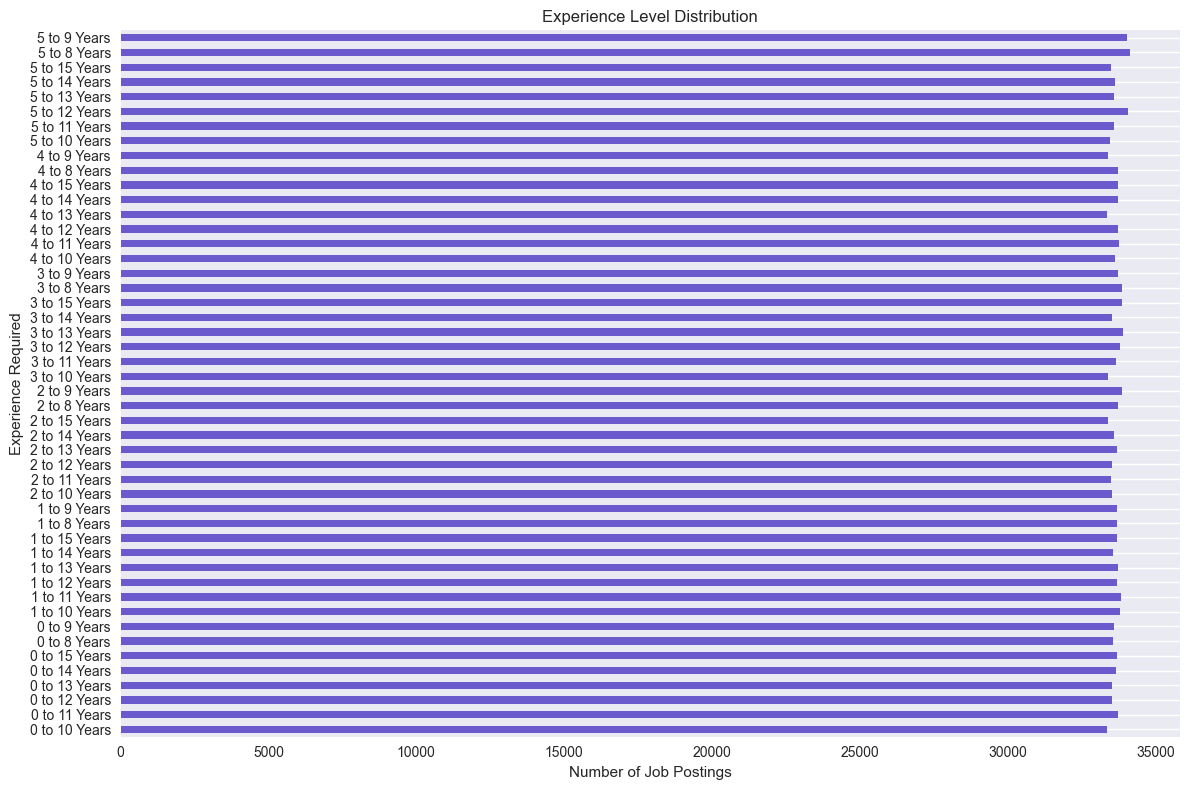

In [21]:
plt.figure(figsize=(12, 8))
df['Experience'].value_counts().sort_index().plot(kind='barh', color='slateblue')
plt.title("Experience Level Distribution")
plt.xlabel("Number of Job Postings")
plt.ylabel("Experience Required")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [23]:
df['Work Type'].unique()

array(['Intern', 'Temporary', 'Full-Time', 'Contract', 'Part-Time'],
      dtype=object)

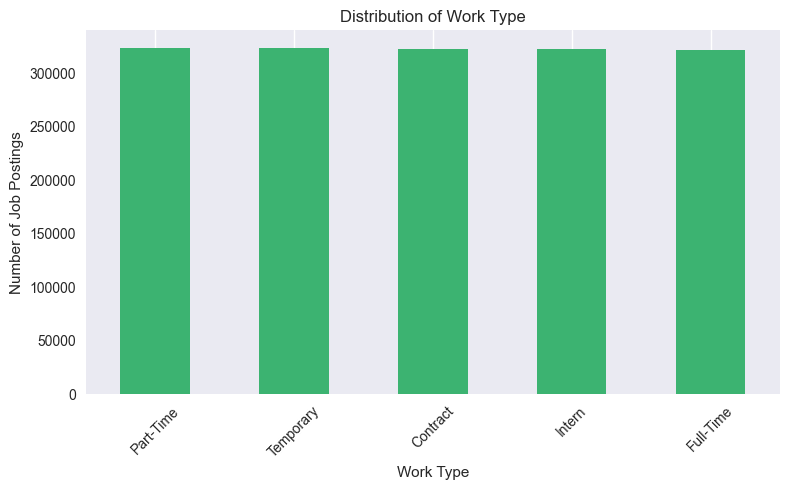

In [25]:
plt.figure(figsize=(8, 5))
df['Work Type'].value_counts().plot(kind='bar', color='mediumseagreen')
plt.title("Distribution of Work Type")
plt.xlabel("Work Type")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [29]:
df['location'].nunique()

214

In [31]:
df['Country'].nunique()

216

In [33]:
df['Qualifications'].nunique()

10

In [36]:
df['Qualifications'].unique()

array(['M.Tech', 'BCA', 'PhD', 'MBA', 'MCA', 'M.Com', 'BBA', 'B.Tech',
       'B.Com', 'BA'], dtype=object)

In [43]:
(df['Qualifications']=="MCA").sum()

160866

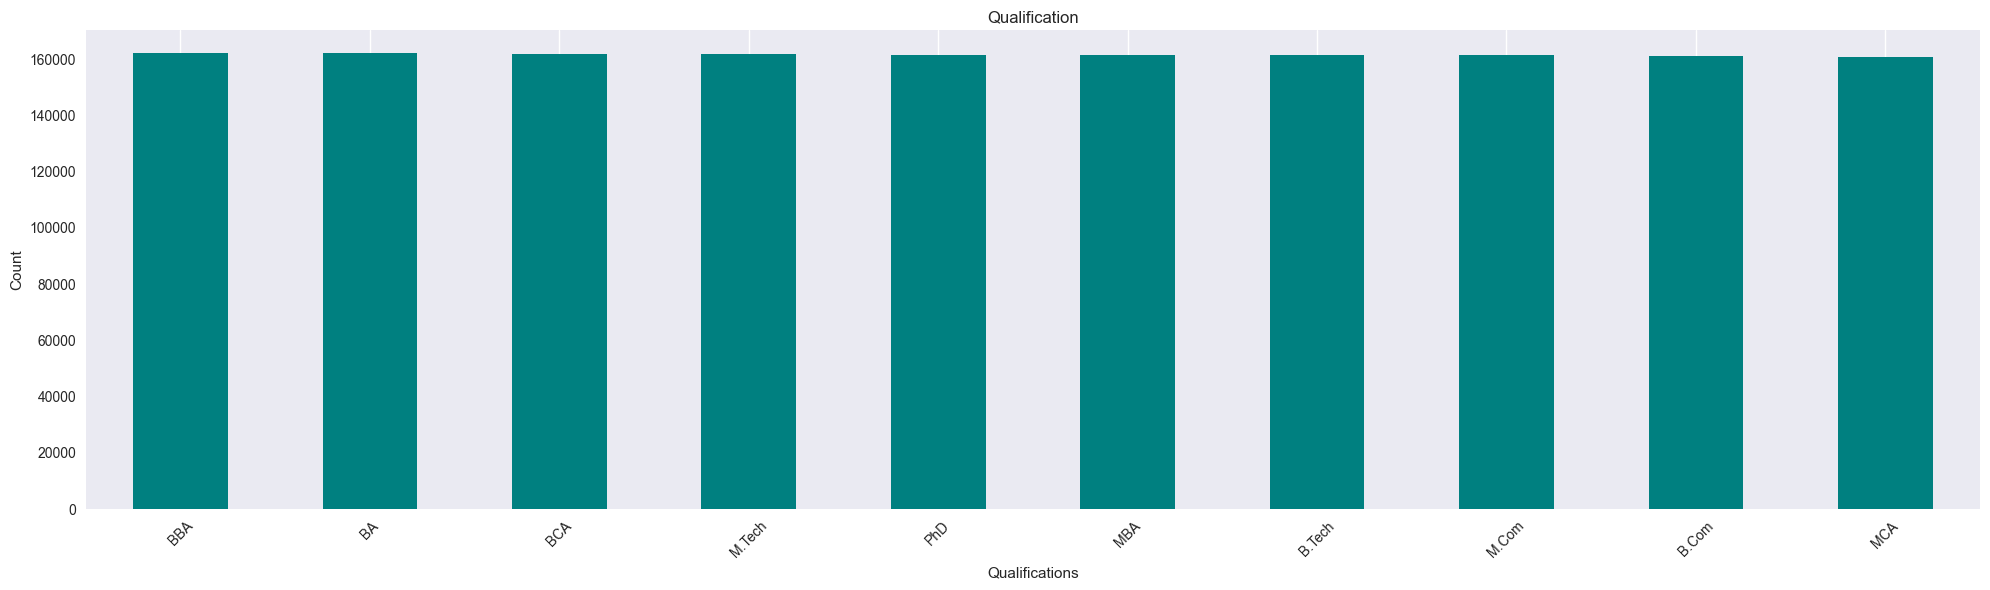

In [42]:
plt.figure(figsize=(20,6))
df['Qualifications'].value_counts().plot(kind='bar', color='teal')
plt.title("Qualification")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 8. Key Insights and Summary

### Dataset Overview
- **Total columns:** 27  
  - **Numerical:** 8 (`int64`: 6, `float64`: 2)  
  - **Categorical (object):** 19  
- **Null values:** None



###  Job Title Analysis
- **Number of unique job titles:** `147`
- **Top 10 Most Common Job Titles:**

  | Rank | Job Title                     | Count   |
  |------|-------------------------------|---------|
  | 1    | UX/UI Designer                | 48,551  |
  | 2    | Digital Marketing Specialist  | 27,975  |
  | 3    | Software Engineer             | 27,630  |
  | 4    | Network Engineer              | 24,393  |
  | 5    | Software Tester               | 20,945  |
  | 6    | Executive Assistant           | 20,776  |
  | 7    | Procurement Manager           | 20,734  |
  | 8    | Financial Advisor             | 20,687  |
  | 9    | Sales Representative          | 17,664  |
  | 10   | Social Media Manager          | 17,613  |



### Text Feature Analysis
- **Job Description Length:** Typically ranges from **50 to 300 characters**, but distribution is **not normal** (likely right-skewed).
- **Skills Length:** Ranges between **50 and 300 characters**.
- **Responsibility Length:** Mostly between **120 and 250 characters**, with a **nearly normal distribution**.


###  Other Feature Insights
- **Experience Level:** Fairly evenly distributed across categories; no dominant experience level.
- **Work Type:** Contains **5 categories**, all **nearly equally represented** — indicating **no significant class imbalance**.
